In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import scale

from sklearn.model_selection import KFold, cross_val_score,cross_validate

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

# Load Data

In [207]:
df_orig = pd.read_csv('./DC_Properties_trimmed.csv')

In [208]:
df_orig.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [209]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 46 columns):
BATHRM                28900 non-null int64
HF_BATHRM             28900 non-null int64
HEAT                  28900 non-null object
AC                    28900 non-null object
NUM_UNITS             28900 non-null int64
ROOMS                 28900 non-null int64
BEDRM                 28900 non-null int64
AYB                   28900 non-null int64
YR_RMDL               28900 non-null int64
EYB                   28900 non-null int64
STORIES               28900 non-null float64
SALEDATE              28900 non-null object
PRICE                 28900 non-null int64
QUALIFIED             28900 non-null object
SALE_NUM              28900 non-null int64
GBA                   28900 non-null int64
BLDG_NUM              28900 non-null int64
STYLE                 28900 non-null object
STRUCT                28900 non-null object
GRADE                 28900 non-null object
CNDTN                 

**We have 28900 entries**
Types seem to be right

### Missing Values

In [210]:
df_orig.isnull().sum()

BATHRM                0
HF_BATHRM             0
HEAT                  0
AC                    0
NUM_UNITS             0
ROOMS                 0
BEDRM                 0
AYB                   0
YR_RMDL               0
EYB                   0
STORIES               0
SALEDATE              0
PRICE                 0
QUALIFIED             0
SALE_NUM              0
GBA                   0
BLDG_NUM              0
STYLE                 0
STRUCT                0
GRADE                 0
CNDTN                 0
EXTWALL               0
ROOF                  0
INTWALL               0
KITCHENS              0
FIREPLACES            0
USECODE               0
LANDAREA              0
GIS_LAST_MOD_DTTM     0
SOURCE                0
FULLADDRESS           0
CITY                  0
STATE                 0
ZIPCODE               0
NATIONALGRID          0
LATITUDE              0
LONGITUDE             0
ASSESSMENT_NBHD       0
ASSESSMENT_SUBNBHD    0
CENSUS_TRACT          0
CENSUS_BLOCK          0
WARD            

No missing values?

In [211]:
for cat_col in df_orig.columns[df_orig.dtypes == object]:
    print(cat_col)
    print(df_orig[cat_col].unique())
    print()

HEAT
['Warm Cool' 'Hot Water Rad' 'Forced Air' 'Elec Base Brd' 'Ht Pump'
 'Wall Furnace' 'Electric Rad' 'Water Base Brd' 'No Data' 'Ind Unit'
 'Evp Cool' 'Air Exchng' 'Air-Oil' 'Gravity Furnac']

AC
['Y' 'N' '0']

SALEDATE
['11/25/2003' '6/21/2016' '7/12/2006' ... '8/19/1998' '7/9/1992'
 '11/20/2000']

QUALIFIED
['Q' 'U']

STYLE
['3 Story' '2 Story' '4 Story' '3.5 Story Fin' '1 Story' '2.5 Story Fin'
 '1.5 Story Fin' '2.5 Story Unfin' 'Default' '3.5 Story Unfin'
 '1.5 Story Unfin' 'Split Level' 'Split Foyer' 'Vacant' '4.5 Story Fin'
 'Bi-Level' '4.5 Story Unfin']

STRUCT
['Row Inside' 'Semi-Detached' 'Single' 'Row End' 'Multi' 'Town Inside'
 'Town End' 'Default']

GRADE
['Very Good' 'Above Average' 'Good Quality' 'Excellent' 'Average'
 'Superior' 'Fair Quality' 'Exceptional-C' 'Exceptional-A' 'Exceptional-B'
 'Exceptional-D' 'No Data']

CNDTN
['Good' 'Very Good' 'Average' 'Excellent' 'Fair' 'Poor' 'Default']

EXTWALL
['Common Brick' 'Stucco' 'Stone' 'Stucco Block' 'Brick/Stone'
 'Concr

Highlights:
- City and State are dummy variables because they are always Washington and DC
- The same for Source and GIS_LAT_MOD_DTTM
- Latitude - Longitude are repeated with X, Y
- The level of precision I will reach it is neighborhood, so I dont need Latitutude, Longitude, NATIONALGRID, ASSESSMENT_SUBNBHD
- Heat and Grade have missing values as 'No Data'
- AC seams to have also missing values filled with '0' value
- Some predictors have the value 'Default'
- Grade and CNDTN are ordinal values

In [212]:
df_orig['HEAT'].value_counts()

Forced Air        12771
Hot Water Rad      9002
Warm Cool          6382
Ht Pump             546
Water Base Brd       52
Wall Furnace         38
Elec Base Brd        30
Electric Rad         21
Gravity Furnac       17
Air-Oil              16
Evp Cool              8
Air Exchng            7
No Data               5
Ind Unit              5
Name: HEAT, dtype: int64

In [213]:
df_orig['GRADE'].value_counts()

Average          9675
Above Average    8619
Good Quality     5907
Very Good        2221
Superior         1035
Excellent         930
Exceptional-A     340
Exceptional-B     102
Fair Quality       36
Exceptional-C      25
Exceptional-D       9
No Data             1
Name: GRADE, dtype: int64

In [214]:
df_orig['AC'].value_counts()

Y    24111
N     4781
0        8
Name: AC, dtype: int64

Just missed 8, 5 and 1 so I will delete those samples

In [215]:
df = df_orig.copy()

In [216]:
df = df.loc[df['HEAT'] != 'No Data',:]
df = df.loc[df['GRADE'] != 'No Data',:]
df = df.loc[df['AC'] != '0',:]

**Delete Dummy Columns**

In [217]:
df.drop(columns=['CITY','STATE','SOURCE','GIS_LAST_MOD_DTTM','X','Y'],inplace = True)

**Default Values**

In [218]:
for cat_col in ['STYLE','EXTWALL','INTWALL']:
    print(cat_col)
    print(df[cat_col].value_counts())
    print()

STYLE
2 Story            22613
3 Story             2936
2.5 Story Fin       1685
1 Story              681
1.5 Story Fin        484
2.5 Story Unfin      180
4 Story              142
Split Foyer           46
3.5 Story Fin         42
Split Level           36
1.5 Story Unfin       24
Default               12
Bi-Level               3
3.5 Story Unfin        2
4.5 Story Fin          1
Vacant                 1
4.5 Story Unfin        1
Name: STYLE, dtype: int64

EXTWALL
Common Brick      22937
Vinyl Siding       1263
Wood Siding        1181
Brick/Siding       1116
Stucco              827
Shingle             264
Aluminum            228
Brick/Stone         212
Brick/Stucco        191
Stone               172
Brick Veneer        115
Stone/Siding         90
Stone Veneer         84
Stone/Stucco         52
Face Brick           47
Hardboard            42
Concrete             18
Concrete Block       16
Metal Siding         15
Stucco Block         10
Default               6
Plywood               3
Name: 

Small number of instances with Default value so I will simply drop them as well

In [219]:
df = df.loc[df['STYLE'] != 'Default',:]
df = df.loc[df['EXTWALL'] != 'Default',:]
df = df.loc[df['INTWALL'] != 'Default',:]

In [220]:
df.shape

(28862, 40)

In [221]:
df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE
count,28862.000000,28862.000000,28862.000000,28862.000000,28862.000000,28862.000000,28862.000000,28862.00000,28862.000000,2.886200e+04,...,28862.000000,28862.000000,28862.000000,28862.000000,28862.000000,28862.000000,28862.000000,28862.000000,28862.000000,28862.000000
mean,2.334315,0.661908,1.261416,7.503846,3.482849,1922.558035,2004.260204,1969.12979,2.164961,6.548545e+05,...,1.000104,1.302682,0.715993,13.726353,2851.918578,20009.906521,38.913199,-77.010715,5508.225695,2664.125043
std,1.038585,0.588129,0.635685,2.318742,1.160264,22.342527,17.189102,10.54599,5.566102,6.043541e+05,...,0.010195,0.697170,0.982840,4.705950,2866.305480,7.541672,0.030290,0.041251,3297.185635,1704.450472
min,0.000000,0.000000,0.000000,2.000000,0.000000,1754.000000,20.000000,1915.00000,0.000000,1.000000e+00,...,1.000000,0.000000,0.000000,11.000000,216.000000,20001.000000,38.819731,-77.113909,100.000000,65.000000
25%,2.000000,0.000000,1.000000,6.000000,3.000000,1908.000000,2002.000000,1964.00000,2.000000,3.100000e+05,...,1.000000,1.000000,0.000000,11.000000,1419.000000,20002.000000,38.892655,-77.033481,2301.000000,1052.000000
50%,2.000000,1.000000,1.000000,7.000000,3.000000,1923.000000,2008.000000,1967.00000,2.000000,5.479450e+05,...,1.000000,1.000000,0.000000,12.000000,1943.000000,20010.000000,38.911308,-77.005583,6700.000000,2621.000000
75%,3.000000,1.000000,1.000000,8.000000,4.000000,1938.000000,2012.000000,1972.00000,2.000000,8.100000e+05,...,1.000000,1.000000,1.000000,13.000000,3366.000000,20016.000000,38.933681,-76.985763,8301.000000,4011.000000
max,11.000000,11.000000,6.000000,31.000000,20.000000,2015.000000,2018.000000,2017.00000,826.000000,2.396029e+07,...,2.000000,44.000000,13.000000,39.000000,155905.000000,20036.000000,38.982532,-76.909758,11100.000000,6277.000000


Highlights:
- Bathrm, Bedrm have values equal to 0?
- Price of a property \$1?

In [222]:
df.loc[df['BATHRM'] == 0,:]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
7992,0,1,Hot Water Rad,N,1,5,2,1900,2012,1978,...,18S UJ 21291 08085,38.903436,-77.060957,Georgetown,025 I Georgetown,100,000100 4023,Ward 2,1190,NW
14746,0,0,Hot Water Rad,N,1,9,4,1925,2014,1950,...,18S UJ 23023 10605,38.926525,-77.041611,Mt. Pleasant,036 B Mt. Pleasant,3900,003900 2001,Ward 1,2587,NW
19712,0,4,Forced Air,Y,1,5,0,1915,2005,1964,...,18S UJ 24810 12369,38.942777,-77.021451,Petworth,042 A Petworth,2400,002400 3000,Ward 4,3226,NW
27175,0,2,Forced Air,Y,1,7,3,1940,2016,1967,...,18S UJ 29941 02948,38.858938,-76.959951,Hillcrest,028 C Hillcrest,7603,007603 2010,Ward 7,5691,SE
28709,0,1,Ht Pump,Y,1,4,2,1947,2017,1967,...,18S UJ 26374 01859,38.848427,-77.000760,Congress Heights,016 B Congress Heights,10400,010400 2019,Ward 8,5997,SE


There are 5 properties that does not have a full bathroom, which seems weird when they also have 5,7 and even 9 rooms. Thus, I consider that these Bathroom values are wrong so I will delete these instances

In [223]:
df = df.loc[df['BATHRM'] != 0,:]

In [224]:
df.loc[df['BEDRM'] == 0,:]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
1266,1,1,Warm Cool,Y,1,3,0,1895,2011,1960,...,18S UJ 25158 09149,38.913843,-77.016617,Old City 2,040 A Old City 2,4600,004600 2003,Ward 5,507,NW
5522,1,1,Forced Air,Y,1,3,0,1908,2012,1964,...,18S UJ 27304 05738,38.883553,-76.991027,Old City 1,039 M Old City 1,6900,006900 1010,Ward 6,992,SE
5709,1,1,Warm Cool,Y,1,3,0,1950,2007,1969,...,18S UJ 27226 06149,38.887236,-76.992028,Capitol Hill,009 B Capitol Hill,6700,006700 3007,Ward 6,969,SE
11324,2,1,Forced Air,Y,1,5,0,2006,2003,2012,...,18S UJ 19103 10982,38.929127,-77.086902,Wesley Heights,054 A Wesley Heights,801,000801 3018,Ward 3,1611,NW
17363,4,0,Warm Cool,Y,1,4,0,1905,2005,1950,...,18S UJ 25048 09309,38.915263,-77.017927,Ledroit Park,031 A Ledroit Park,3400,003400 2023,Ward 1,3094,NW


Same for Bedrooms

In [225]:
df = df.loc[df['BEDRM'] != 0,:]

**Target Variable: PRICE**

In [226]:
targetVar = 'PRICE'

## EDA (Exploratory Data Analysis) 

### Price 

Text(0.5, 1.0, 'PRICE Distribution (with outliers)')

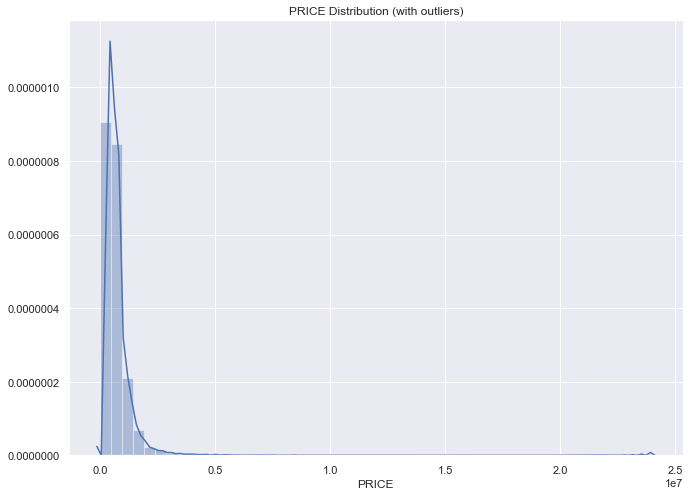

In [227]:
sns.distplot(df[targetVar]).set_title('PRICE Distribution (with outliers)')

**Outliers**

In [228]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'],format=r"%m/%d/%Y")

df['SALEDATE_YEAR'] = df['SALEDATE'].dt.year
df['SALEDATE_MONTH'] = df['SALEDATE'].dt.month
df['SALEDATE_QUARTER'] = df['SALEDATE'].dt.quarter

In [229]:
neighhd = df['ASSESSMENT_NBHD'].unique()
sale_year = df['SALEDATE_YEAR'].unique()

In [230]:
index_price_outliers = [False] * df.shape[0]

In [231]:
for hood in neighhd:
    for year in sale_year:
        index = (df['ASSESSMENT_NBHD'] == hood) | (df['SALEDATE_YEAR'] == year)
        prices = df.loc[index,'PRICE']
        
        q3 = prices.describe()['75%']
        q1 = prices.describe()['25%']
        iqr = q3 - q1

        lower_bound = q1 - (1.5*iqr)
        upper_bound = q3 + (1.5*iqr)
        index2 = (df['PRICE'] < lower_bound) | (df['PRICE'] > upper_bound)
        
        index &= index2 #Outliers: samples in that hood and sold that year AND out of bounds
        index_price_outliers |=index

In [232]:
sum(index_price_outliers)

3884

Text(0.5, 1.0, 'PRICE Distribution (without outliers)')

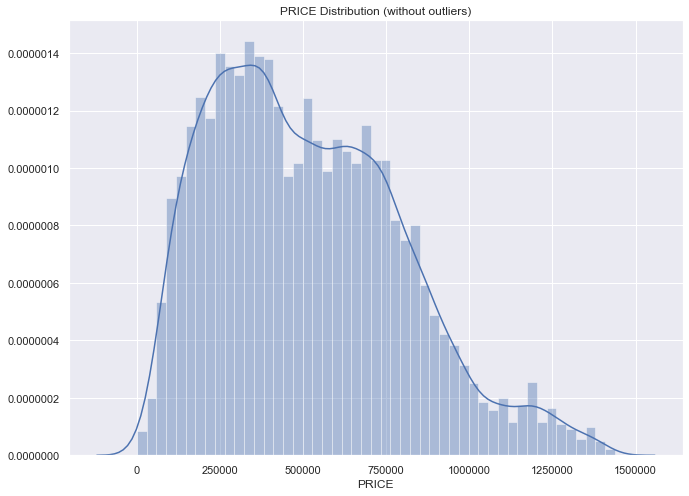

In [233]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df.loc[~index_price_outliers,targetVar]).set_title('PRICE Distribution (without outliers)')

There are still Price values near to 0, lets check those samples

In [234]:
df[targetVar].sort_values(ascending=True).index

Int64Index([28896,  8174, 17936, 14323, 28185, 15819, 24198, 16138, 17882,
            17622,
            ...
              891,  9656,  9626, 13065, 25888, 25889,  9181,  9478,  9094,
             8922],
           dtype='int64', length=28852)

In [235]:
df.loc[df[targetVar].sort_values(ascending=True).index,['PRICE','ASSESSMENT_NBHD','ROOMS','BEDRM','AYB','SALEDATE']].head(20)

,PRICE,ASSESSMENT_NBHD,ROOMS,BEDRM,AYB,SALEDATE
28896,1,Congress Heights,14,6,1953,2000-11-20
8174,10,Georgetown,8,3,1890,2018-05-15
17936,250,Ledroit Park,9,5,1909,1999-10-20
14323,250,Columbia Heights,8,3,1905,1999-11-08
28185,250,Anacostia,5,2,1905,1998-10-20
15819,250,Columbia Heights,8,5,1908,1999-11-08
24198,250,Old City 1,8,2,1909,1998-10-01
16138,250,Columbia Heights,9,6,1910,1999-10-29
17882,250,Ledroit Park,10,6,1906,1999-10-26
17622,500,Ledroit Park,8,4,1900,1999-10-19


In [236]:
df.loc[df['SALEDATE_YEAR']==1999]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,SALEDATE_YEAR,SALEDATE_MONTH,SALEDATE_QUARTER
15,2,1,Forced Air,Y,1,6,2,1890,2004,1960,...,Old City 2,040 E Old City 2,5201,005201 4003,Ward 2,208,NW,1999,3,1
34,3,1,Hot Water Rad,N,3,10,4,1885,2009,1960,...,Old City 2,040 E Old City 2,5201,005201 2000,Ward 2,192,NW,1999,2,1
211,2,1,Warm Cool,Y,1,7,3,1875,2013,1969,...,Old City 2,040 D Old City 2,5301,005301 4000,Ward 2,179,NW,1999,2,1
250,2,0,Warm Cool,Y,1,6,2,1983,1983,1986,...,Old City 2,040 E Old City 2,5001,005001 2001,Ward 2,239,NW,1999,5,2
334,3,1,Hot Water Rad,Y,2,9,4,1890,2003,1991,...,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,NW,1999,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28510,1,0,Forced Air,N,1,6,2,1941,1998,1976,...,Congress Heights,016 A Congress Heights,9807,009807 1004,Ward 8,6173,SW,1999,6,2
28575,1,0,Warm Cool,Y,1,6,2,1941,1984,1954,...,Congress Heights,016 A Congress Heights,9807,009807 2009,Ward 8,6239,SW,1999,11,4
28655,2,0,Hot Water Rad,N,1,6,4,1947,1991,1954,...,Congress Heights,016 C Congress Heights,9801,009801 1014,Ward 8,6153,SE,1999,3,1
28656,1,0,Warm Cool,Y,1,8,3,1910,1992,1954,...,Congress Heights,016 C Congress Heights,9801,009801 1014,Ward 8,6153,SE,1999,11,4


We will continue the EDA without outliers

In [237]:
df = df.loc[~index_price_outliers,:]

In [238]:
df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE,SALEDATE_YEAR,SALEDATE_MONTH,SALEDATE_QUARTER
count,24968.000000,24968.000000,24968.000000,24968.000000,24968.000000,24968.000000,24968.000000,24968.000000,24968.000000,2.496800e+04,...,24968.000000,24968.000000,24968.000000,24968.000000,24968.000000,24968.000000,24968.000000,24968.000000,24968.000000,24968.000000
mean,2.167815,0.610662,1.251562,7.212712,3.340916,1922.936999,2004.443327,1967.466477,2.089150,5.133839e+05,...,13.599527,2524.067767,20009.932674,38.911785,-77.003811,5953.530519,2850.742991,2010.221804,6.656280,2.545618
std,0.913288,0.568961,0.630303,2.143949,1.062627,20.784415,17.884379,9.338428,5.227575,2.872562e+05,...,4.610154,1851.245182,7.824193,0.030964,0.037898,3166.417083,1730.936107,6.332345,3.290614,1.073575
min,1.000000,0.000000,0.000000,2.000000,1.000000,1765.000000,20.000000,1915.000000,0.000000,1.000000e+00,...,11.000000,216.000000,20001.000000,38.819731,-77.113172,100.000000,65.000000,1986.000000,1.000000,1.000000
25%,1.000000,0.000000,1.000000,6.000000,3.000000,1909.000000,2003.000000,1964.000000,2.000000,2.810000e+05,...,11.000000,1375.000000,20002.000000,38.891460,-77.025517,2702.000000,1053.000000,2006.000000,4.000000,2.000000
50%,2.000000,1.000000,1.000000,7.000000,3.000000,1923.000000,2008.000000,1967.000000,2.000000,4.760000e+05,...,11.000000,1836.000000,20010.000000,38.909085,-77.000045,7000.000000,2890.000000,2012.000000,7.000000,3.000000
75%,3.000000,1.000000,1.000000,8.000000,4.000000,1938.000000,2013.000000,1969.000000,2.000000,7.100000e+05,...,13.000000,3000.000000,20017.000000,38.933497,-76.983571,8402.000000,4143.000000,2015.000000,9.000000,3.000000
max,10.000000,11.000000,6.000000,30.000000,14.000000,2012.000000,2018.000000,2015.000000,826.000000,1.437500e+06,...,24.000000,33527.000000,20036.000000,38.982532,-76.909758,11100.000000,6277.000000,2018.000000,12.000000,4.000000


### Size Features 

In [32]:
sizeVars = ['BATHRM','HF_BATHRM','ROOMS','BEDRM','GBA','KITCHENS','FIREPLACES','LANDAREA']

In [33]:
df[sizeVars + [targetVar]]

,BATHRM,HF_BATHRM,ROOMS,BEDRM,GBA,KITCHENS,FIREPLACES,LANDAREA,PRICE
8,3,1,14,5,3465,1,3,2090,33232
10,2,1,5,3,1600,1,1,2090,1065000
11,2,1,8,3,1958,1,2,2090,1100000
12,1,0,8,4,2099,1,0,2090,20000
13,3,0,9,3,2520,4,0,1853,703700
...,...,...,...,...,...,...,...,...,...
28895,3,0,13,8,1600,3,0,5311,118000
28896,3,0,14,6,2150,3,0,7811,1
28897,2,0,10,4,1600,2,0,5302,185000
28898,2,0,10,4,1600,2,0,3046,215000


**Outliers**

In [34]:
for col in sizeVars:
    col_mean = df[col].mean()
    col_std = df[col].std()
    col_stand = (df[col] - col_mean) / col_std
    index_outliers = abs(col_stand) >= 4
    
    df = df.loc[~index_outliers,:]

In [35]:
df.shape

(23755, 43)

Highlights:
- Bathrooms, Rooms and Bedrm seams to be the predictors more related to the price
- In Bathrooms the max price increase until 4 bathrooms and in Bedrooms until 4 as well.
- GBA and Landarea seems to have also a positive correlation
- Fireplaces and kitchen does not seem important to estimate the price

**Rooms vs Price**

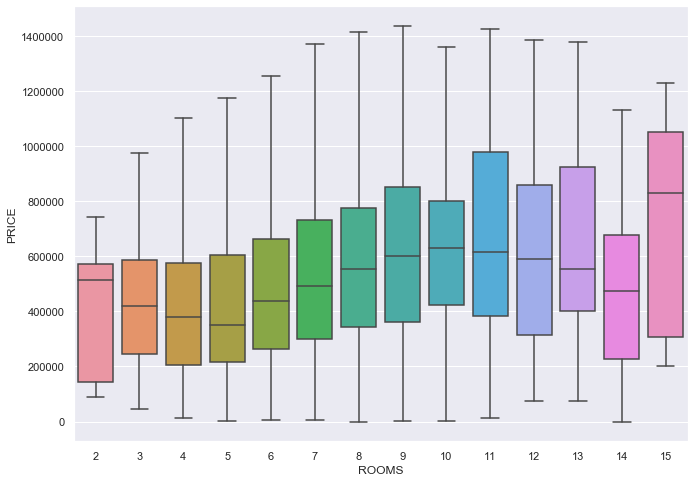

In [36]:
sns.boxplot(x='ROOMS',y='PRICE', data=df,showfliers=False)

In [180]:
print(df.loc[df['ROOMS'] == 2,'PRICE'].median())
print(df.loc[df['ROOMS'] == 3,'PRICE'].median())
print((df.loc[df['ROOMS'] == 2,'PRICE'].median() - df.loc[df['ROOMS'] == 3,'PRICE'].median())/df.loc[df['ROOMS'] == 2,'PRICE'].median())

446500.0
418750.0
0.06215005599104143


**Bedrooms vs Price**

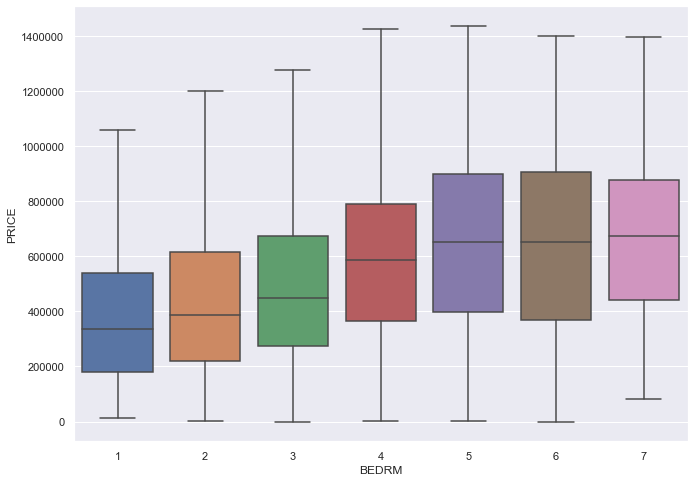

In [37]:
sns.boxplot(x='BEDRM',y='PRICE',data=df,showfliers=False)

**Bathrooms vs Price**

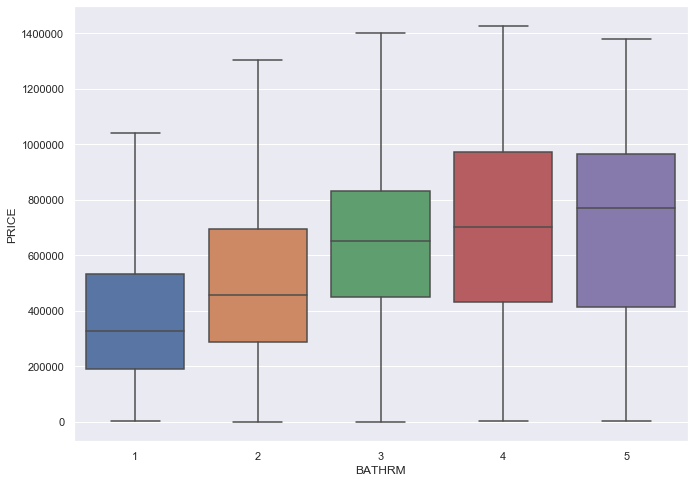

In [38]:
sns.boxplot(x='BATHRM',y='PRICE',data=df,showfliers=False)

In [173]:
price_bath_1 = df.loc[df['BATHRM'] == 1,'PRICE'].mean()
price_bath_2 = df.loc[df['BATHRM'] == 2,'PRICE'].mean()
price_bath_3 = df.loc[df['BATHRM'] == 3,'PRICE'].mean()
print((price_bath_2 - price_bath_1)/price_bath_1)
print((price_bath_3 - price_bath_2)/price_bath_2)

0.3337580596614112
0.3137285970171743


### Location Features 

In [39]:
locationVars = ['NUM_UNITS','FULLADDRESS','ZIPCODE','ASSESSMENT_NBHD'
                ,'CENSUS_TRACT','CENSUS_BLOCK','WARD','SQUARE','QUADRANT']

**Price vs Noeighborhood**

In [40]:
df['ASSESSMENT_NBHD'].value_counts()

Old City 1             5023
Columbia Heights       1743
Old City 2             1451
Deanwood               1368
Petworth               1296
Chevy Chase            1201
Capitol Hill           1156
Brookland              1093
Brightwood              971
Trinidad                756
Fort Dupont Park        728
Eckington               669
Woodridge               654
Congress Heights        615
16th Street Heights     591
Mt. Pleasant            561
Ledroit Park            544
Georgetown              477
Hillcrest               446
American University     430
Anacostia               421
Randle Heights          280
Marshall Heights        274
Lily Ponds              214
Palisades               191
Brentwood               164
Burleith                150
Kent                    100
Wesley Heights           53
Berkley                  49
Spring Valley            46
Kalorama                 40
Name: ASSESSMENT_NBHD, dtype: int64

[Text(0, 0, 'Old City 2'),
 Text(0, 0, 'Old City 1'),
 Text(0, 0, 'Capitol Hill'),
 Text(0, 0, 'Georgetown'),
 Text(0, 0, 'Burleith'),
 Text(0, 0, 'Palisades'),
 Text(0, 0, 'Berkley'),
 Text(0, 0, 'Kent'),
 Text(0, 0, 'American University'),
 Text(0, 0, 'Spring Valley'),
 Text(0, 0, 'Wesley Heights'),
 Text(0, 0, 'Chevy Chase'),
 Text(0, 0, 'Kalorama'),
 Text(0, 0, 'Mt. Pleasant'),
 Text(0, 0, 'Columbia Heights'),
 Text(0, 0, '16th Street Heights'),
 Text(0, 0, 'Brightwood'),
 Text(0, 0, 'Petworth'),
 Text(0, 0, 'Ledroit Park'),
 Text(0, 0, 'Eckington'),
 Text(0, 0, 'Brookland'),
 Text(0, 0, 'Brentwood'),
 Text(0, 0, 'Trinidad'),
 Text(0, 0, 'Woodridge'),
 Text(0, 0, 'Lily Ponds'),
 Text(0, 0, 'Deanwood'),
 Text(0, 0, 'Marshall Heights'),
 Text(0, 0, 'Fort Dupont Park'),
 Text(0, 0, 'Hillcrest'),
 Text(0, 0, 'Anacostia'),
 Text(0, 0, 'Randle Heights'),
 Text(0, 0, 'Congress Heights')]

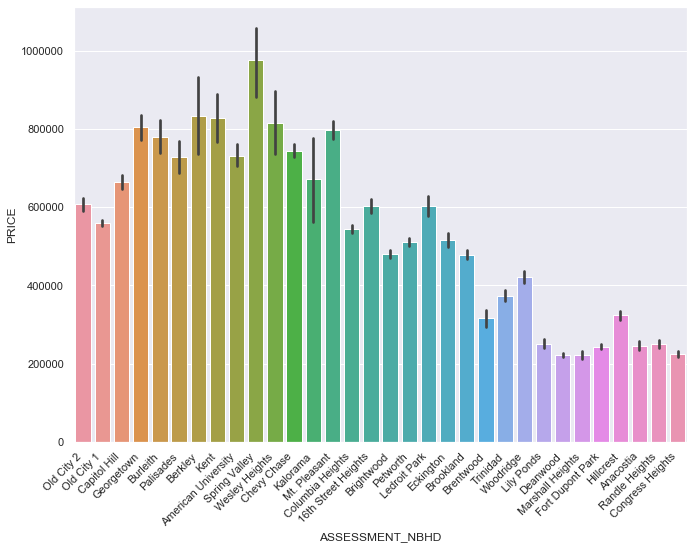

In [41]:
plt = sns.barplot(y = targetVar,x='ASSESSMENT_NBHD',data=df)
plt.set_xticklabels(plt.get_xticklabels(), rotation=45, horizontalalignment='right')

**Quadrant vs Price**

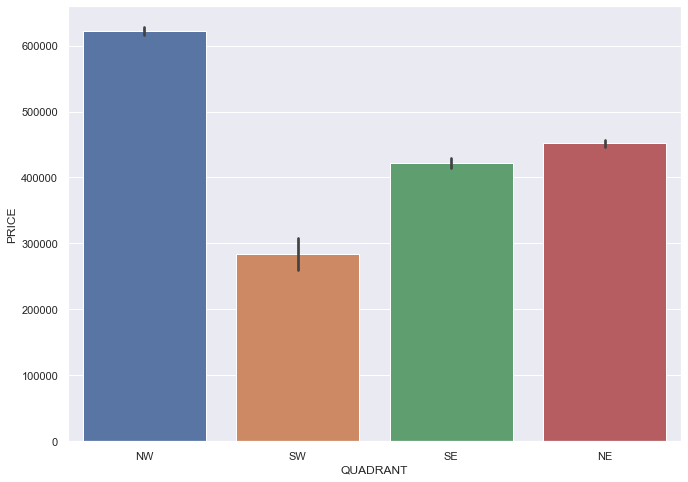

In [42]:
plt = sns.barplot(y = targetVar,x='QUADRANT',data=df)

**Num Units vs Price**

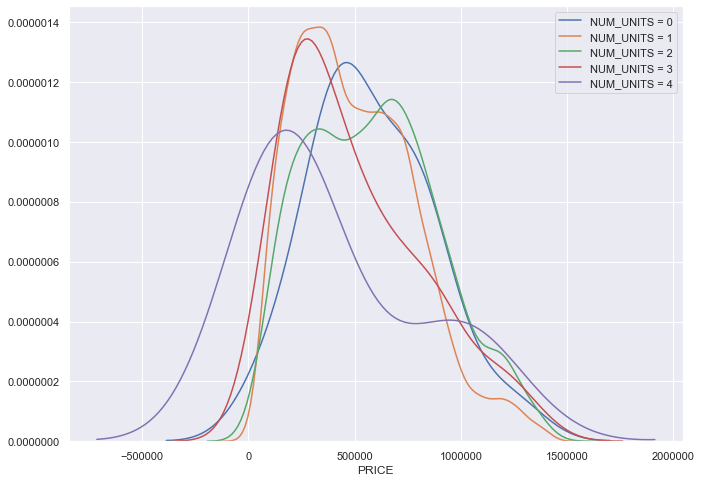

In [190]:
sns.distplot(df.loc[df['NUM_UNITS']==0,'PRICE'],hist=False,label='NUM_UNITS = 0')
sns.distplot(df.loc[df['NUM_UNITS']==1,'PRICE'],hist=False,label='NUM_UNITS = 1')
sns.distplot(df.loc[df['NUM_UNITS']==2,'PRICE'],hist=False,label='NUM_UNITS = 2')
sns.distplot(df.loc[df['NUM_UNITS']==3,'PRICE'],hist=False,label='NUM_UNITS = 3')
sns.distplot(df.loc[df['NUM_UNITS']==4,'PRICE'],hist=False,label='NUM_UNITS = 4')


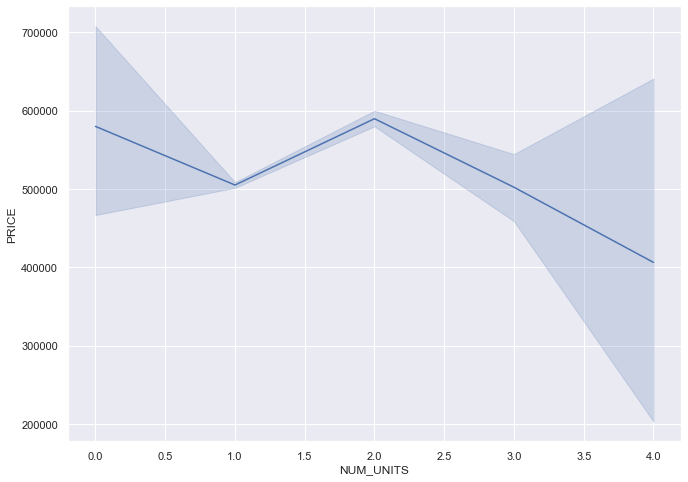

In [43]:
sns.lineplot(x='NUM_UNITS',y='PRICE',data=df)

**Ward vs Price**

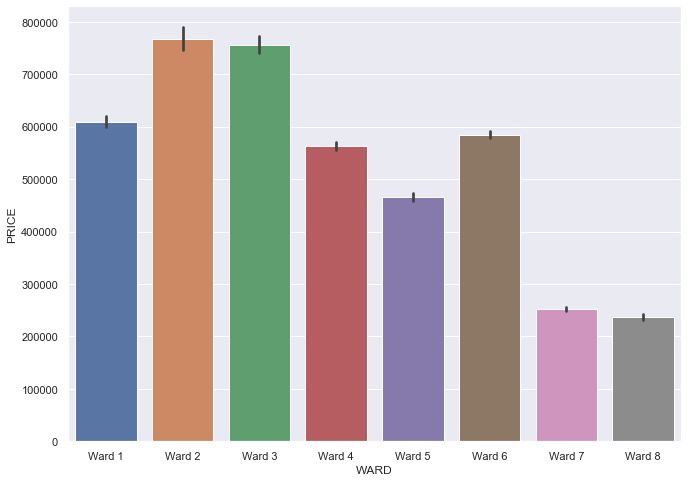

In [44]:
wards = ['Ward 1','Ward 2','Ward 3','Ward 4','Ward 5','Ward 6','Ward 7','Ward 8']
plt = sns.barplot(y = targetVar,x='WARD',data=df,order=wards)


In [45]:
df.drop(columns=['FULLADDRESS'],inplace=True)

### Time Variables

In [46]:
timeVar = ['AYB','YR_RMDL','EYB','SALEDATE']

**AYB/EYB vs PRICE**

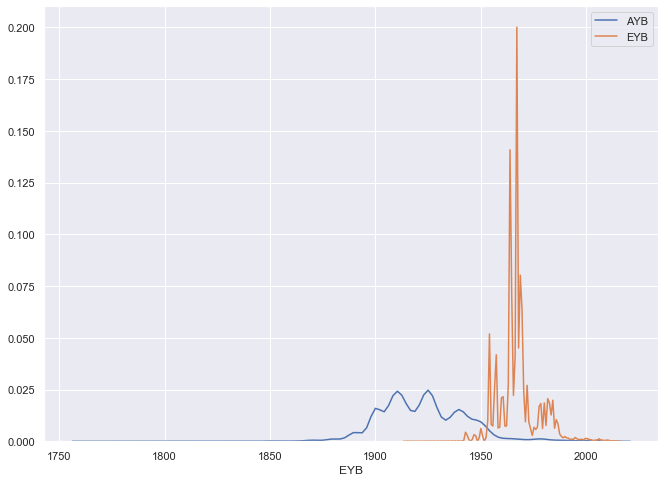

In [201]:
sns.distplot(df['AYB'],label = 'AYB',hist=False)
sns.distplot(df['EYB'],label = 'EYB',hist=False)

In [202]:
df[['AYB','EYB']].describe()

,AYB,EYB
count,23739.000000,23739.000000
mean,1922.584018,1967.637095
std,20.718525,9.327114
min,1765.000000,1915.000000
25%,1909.000000,1964.000000
50%,1923.000000,1967.000000
75%,1937.000000,1969.000000
max,2012.000000,2015.000000


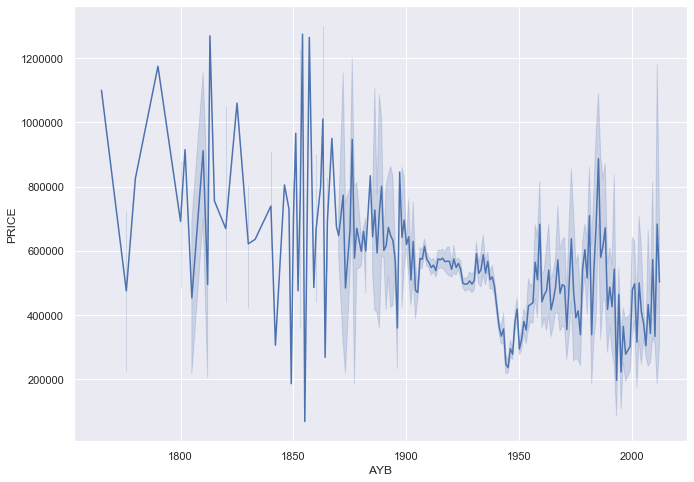

In [192]:
sns.lineplot(x='AYB',y='PRICE',data=df)

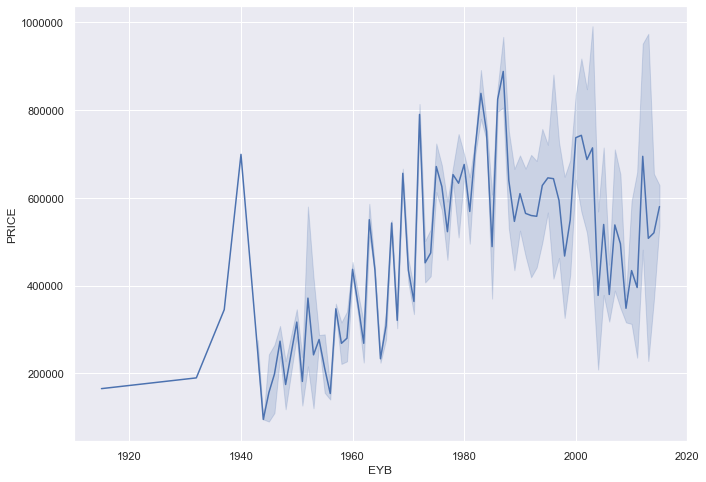

In [48]:
sns.lineplot(x='EYB',y='PRICE',data=df,)

In [49]:
sum(df['EYB'] < df['AYB'])

1

In [50]:
df = df.loc[df['EYB'] >= df['AYB'],:]

In [51]:
df = df.copy()
df["DiffYB"] = df['EYB'] - df['AYB']

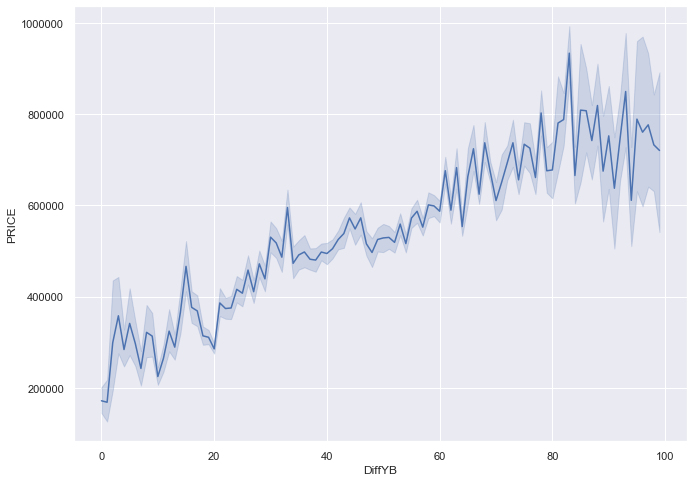

In [205]:
sns.lineplot(x='DiffYB',y='PRICE',data=df.loc[df['DiffYB'] < 100])

**YR_RMDL vs Price**

Error in YR_RMDL equal to 20

In [53]:
df = df.loc[df['YR_RMDL'] != 20,:]

In [54]:
sum(df['YR_RMDL'] < df['AYB'])

14

In [55]:
df = df.loc[df['YR_RMDL'] >= df['AYB']]

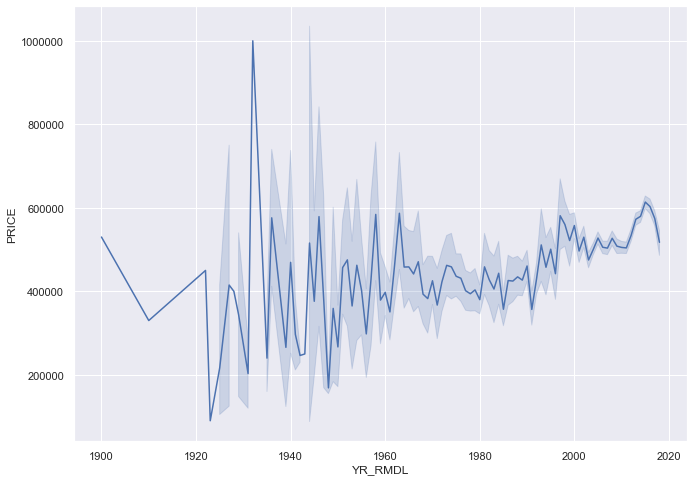

In [56]:
sns.lineplot(x='YR_RMDL',y='PRICE',data=df)

In [57]:
df['Diff_YB_YRMDL'] = df['YR_RMDL'] - df['AYB']

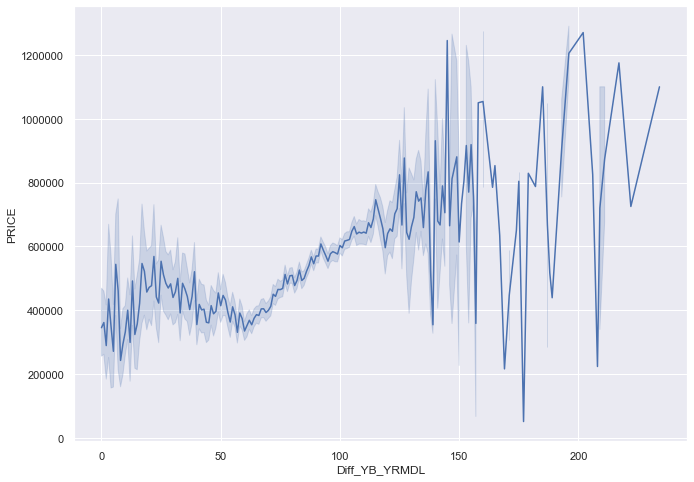

In [58]:
sns.lineplot(x='Diff_YB_YRMDL',y='PRICE',data=df)

**SaleDate vs Price**

[Text(0, 0, '1986'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018')]

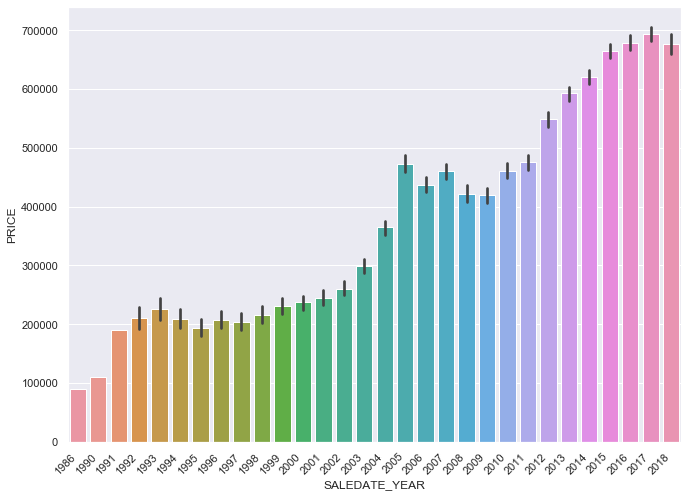

In [59]:
plot = sns.barplot(x='SALEDATE_YEAR',y='PRICE',data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

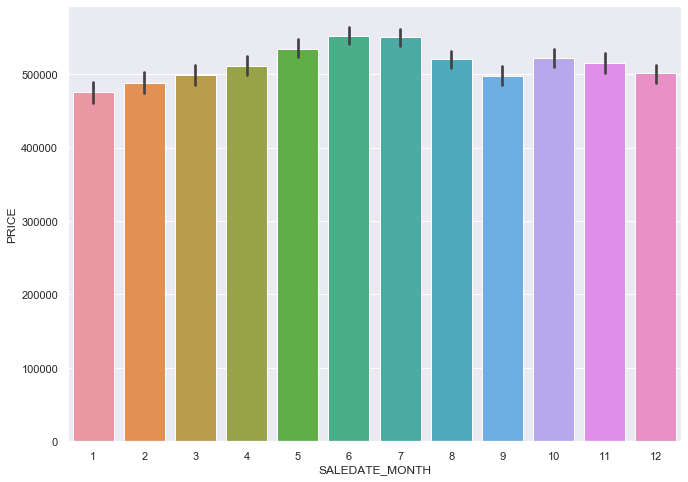

In [60]:
sns.barplot(x='SALEDATE_MONTH',y='PRICE',data=df)

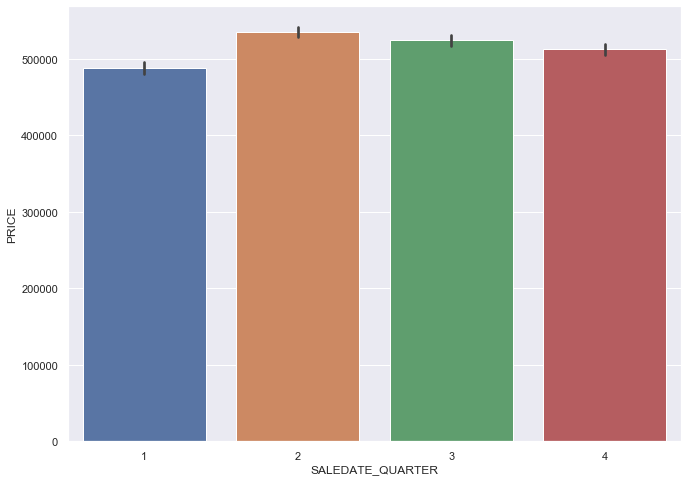

In [61]:
sns.barplot(x='SALEDATE_QUARTER',y='PRICE',data=df)

### Heat and AC 

[Text(0, 0, 'Hot Water Rad'),
 Text(0, 0, 'Forced Air'),
 Text(0, 0, 'Warm Cool'),
 Text(0, 0, 'Ht Pump'),
 Text(0, 0, 'Electric Rad'),
 Text(0, 0, 'Wall Furnace'),
 Text(0, 0, 'Elec Base Brd'),
 Text(0, 0, 'Ind Unit'),
 Text(0, 0, 'Water Base Brd'),
 Text(0, 0, 'Evp Cool'),
 Text(0, 0, 'Air Exchng'),
 Text(0, 0, 'Air-Oil'),
 Text(0, 0, 'Gravity Furnac')]

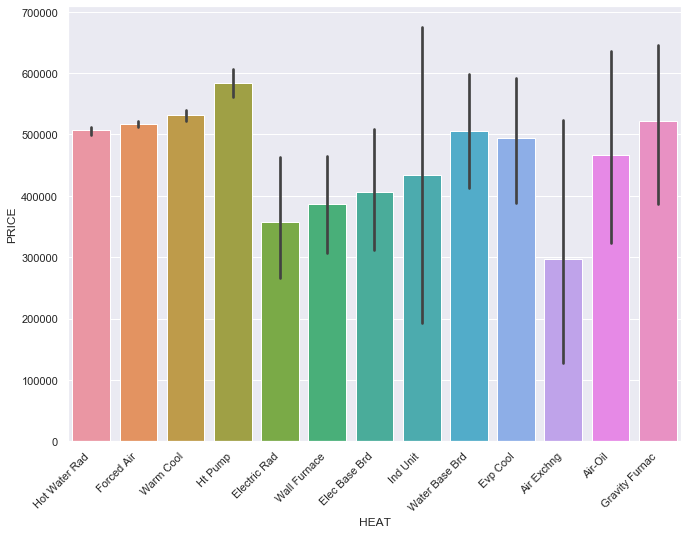

In [62]:
plot = sns.barplot(x='HEAT',y='PRICE',data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

In [63]:
df['AC'] = df['AC'].astype('object')

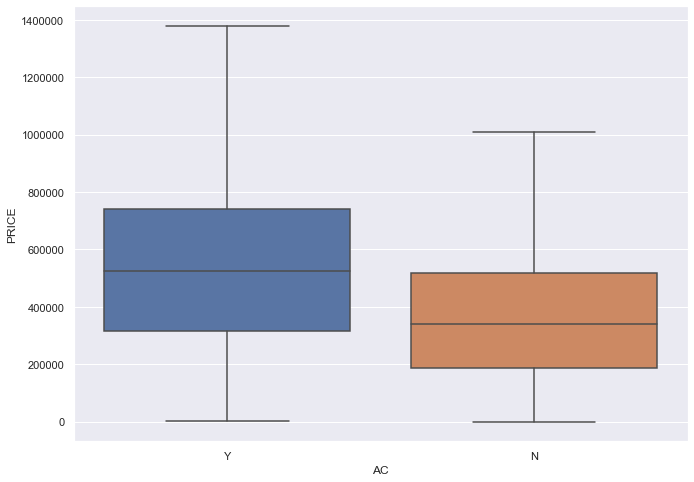

In [64]:
sns.boxplot(y ='PRICE',x='AC',data=df,showfliers=False)

[Text(0, 0, 'Hot Water Rad'),
 Text(0, 0, 'Forced Air'),
 Text(0, 0, 'Warm Cool'),
 Text(0, 0, 'Ht Pump'),
 Text(0, 0, 'Electric Rad'),
 Text(0, 0, 'Wall Furnace'),
 Text(0, 0, 'Elec Base Brd'),
 Text(0, 0, 'Ind Unit'),
 Text(0, 0, 'Water Base Brd'),
 Text(0, 0, 'Evp Cool'),
 Text(0, 0, 'Air Exchng'),
 Text(0, 0, 'Air-Oil'),
 Text(0, 0, 'Gravity Furnac')]

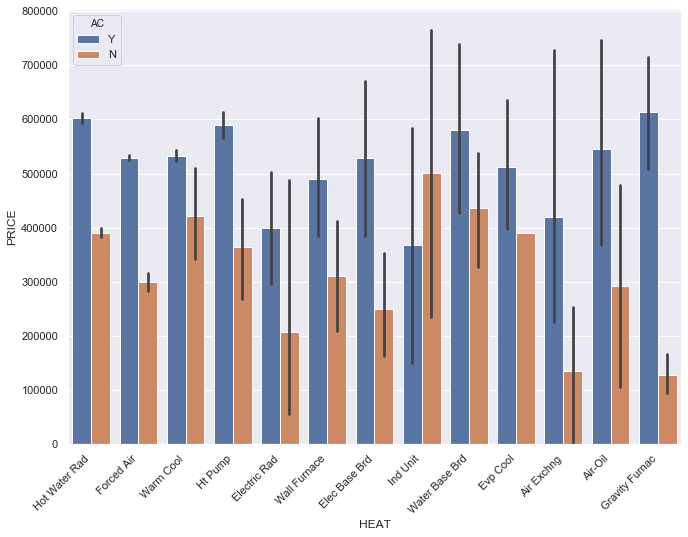

In [65]:
plot = sns.barplot(x='HEAT',y='PRICE',hue='AC',data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

### Style Variables

In [239]:
styleVars = ['STYLE','STORIES','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL']

In [244]:
gradeVars = ['Fair Quality','Average','Above Average','Good Quality','Very Good','Excellent','Superior','Exceptional-A',
             'Exceptional-B']

[Text(0, 0, 'Fair Quality'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Above Average'),
 Text(0, 0, 'Good Quality'),
 Text(0, 0, 'Very Good'),
 Text(0, 0, 'Excellent'),
 Text(0, 0, 'Superior'),
 Text(0, 0, 'Exceptional-A'),
 Text(0, 0, 'Exceptional-B')]

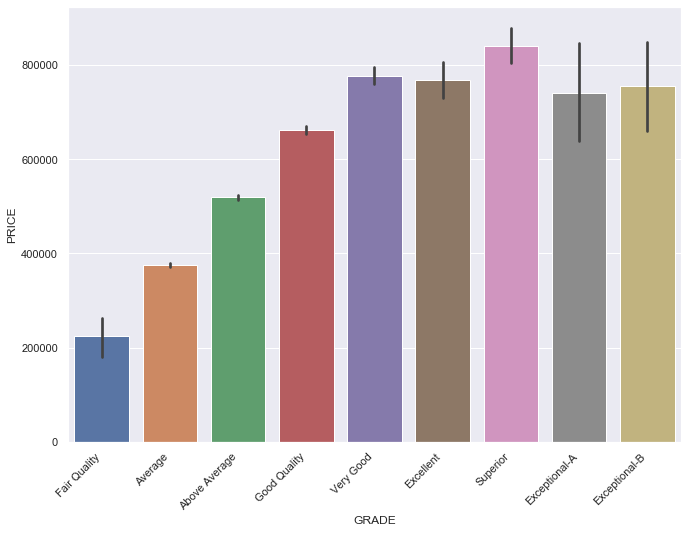

In [245]:
plot = sns.barplot(y='PRICE',x='GRADE',data=df,order=gradeVars)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

In [246]:
df.loc[df['GRADE'].str.startswith('Exceptional'),'GRADE'] = 'Exceptional'

[Text(0, 0, 'Fair Quality'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Above Average'),
 Text(0, 0, 'Good Quality'),
 Text(0, 0, 'Very Good'),
 Text(0, 0, 'Excellent'),
 Text(0, 0, 'Superior'),
 Text(0, 0, 'Exceptional')]

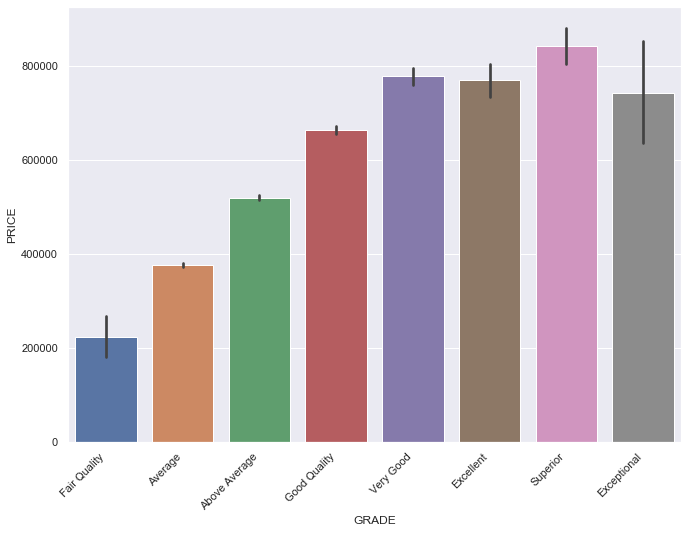

In [247]:
gradeVars = ['Fair Quality','Average','Above Average','Good Quality','Very Good','Excellent','Superior','Exceptional']

plt = sns.barplot(y='PRICE',x='GRADE',data=df,order=gradeVars)
plt.set_xticklabels(plt.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Poor'),
 Text(0, 0, 'Fair'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Good'),
 Text(0, 0, 'Very Good'),
 Text(0, 0, 'Excellent')]

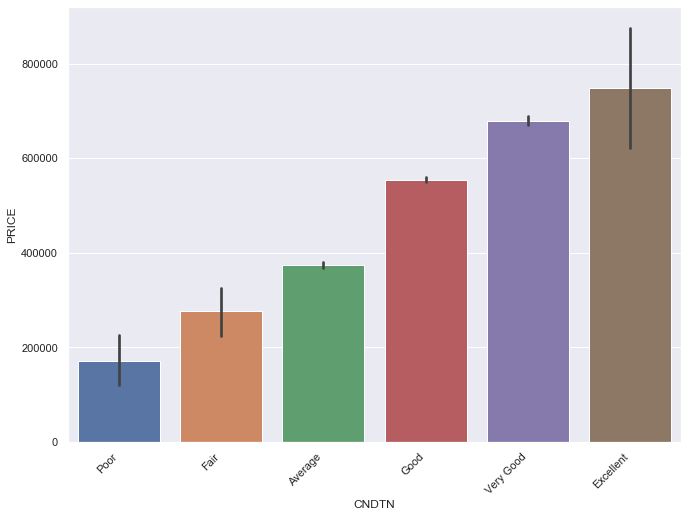

In [71]:
cndtnVars = ['Poor','Fair','Average','Good','Very Good','Excellent']
plt = sns.barplot(y='PRICE',x='CNDTN',data=df,order=cndtnVars)
plt.set_xticklabels(plt.get_xticklabels(), rotation=45, horizontalalignment='right')

In [72]:
extWallVars = df.groupby('EXTWALL').mean()['PRICE'].sort_values(ascending=False).index

[Text(0, 0, 'Stone/Stucco'),
 Text(0, 0, 'Brick/Stone'),
 Text(0, 0, 'Hardboard'),
 Text(0, 0, 'Face Brick'),
 Text(0, 0, 'Brick/Stucco'),
 Text(0, 0, 'Wood Siding'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'Concrete Block'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'Common Brick'),
 Text(0, 0, 'Stone/Siding'),
 Text(0, 0, 'Stone Veneer'),
 Text(0, 0, 'Brick/Siding'),
 Text(0, 0, 'Brick Veneer'),
 Text(0, 0, 'Stucco Block'),
 Text(0, 0, 'Metal Siding'),
 Text(0, 0, 'Shingle'),
 Text(0, 0, 'Aluminum'),
 Text(0, 0, 'Concrete'),
 Text(0, 0, 'Vinyl Siding'),
 Text(0, 0, 'Plywood')]

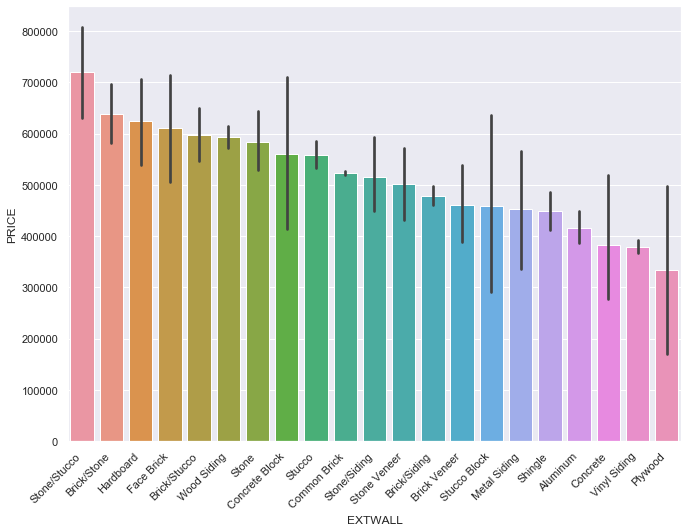

In [73]:
plot = sns.barplot(y='PRICE',x='EXTWALL',data=df,order=extWallVars)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Parquet'),
 Text(0, 0, 'Vinyl Comp'),
 Text(0, 0, 'Ceramic Tile'),
 Text(0, 0, 'Hardwood'),
 Text(0, 0, 'Wood Floor'),
 Text(0, 0, 'Hardwood/Carp'),
 Text(0, 0, 'Lt Concrete'),
 Text(0, 0, 'Carpet'),
 Text(0, 0, 'Vinyl Sheet'),
 Text(0, 0, 'Resiliant')]

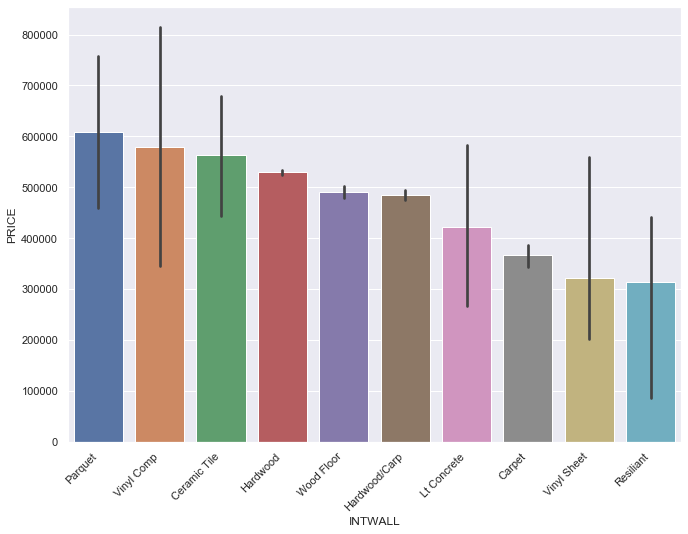

In [74]:
intWallVars = df.groupby('INTWALL').mean()['PRICE'].sort_values(ascending=False).index
plot = sns.barplot(y='PRICE',x='INTWALL',data=df,order=intWallVars)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

In [248]:
df['INTWALL'].value_counts()

Hardwood         19107
Hardwood/Carp     3013
Wood Floor        2262
Carpet             533
Ceramic Tile        23
Lt Concrete         15
Vinyl Comp           4
Parquet              4
Resiliant            4
Vinyl Sheet          3
Name: INTWALL, dtype: int64

In [75]:
tmp = ['Ceramic Tile','Lt Concrete','Parquet','Resiliant','Vinyl Sheet','Vinyl Comp']
df['INTWALL2'] = df['INTWALL']
df.loc[df['INTWALL'].isin(tmp),'INTWALL2'] = 'Other'

[Text(0, 0, 'Hardwood'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Wood Floor'),
 Text(0, 0, 'Hardwood/Carp'),
 Text(0, 0, 'Carpet')]

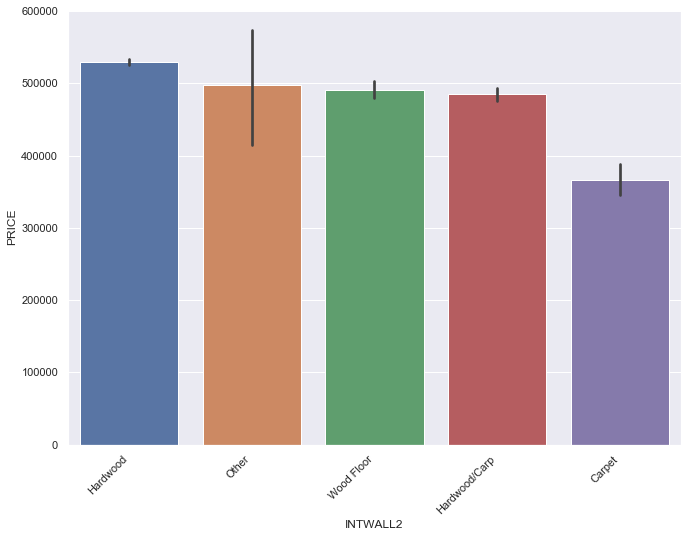

In [76]:
intWallVars = df.groupby('INTWALL2').mean()['PRICE'].sort_values(ascending=False).index
plot = sns.barplot(y='PRICE',x='INTWALL2',data=df,order=intWallVars)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

### Roof

[Text(0, 0, 'Built Up'),
 Text(0, 0, 'Metal- Sms'),
 Text(0, 0, 'Slate'),
 Text(0, 0, 'Comp Shingle'),
 Text(0, 0, 'Neopren'),
 Text(0, 0, 'Metal- Pre'),
 Text(0, 0, 'Shingle'),
 Text(0, 0, 'Composition Ro'),
 Text(0, 0, 'Shake'),
 Text(0, 0, 'Typical'),
 Text(0, 0, 'Metal- Cpr'),
 Text(0, 0, 'Water Proof'),
 Text(0, 0, 'Clay Tile'),
 Text(0, 0, 'Wood- FS')]

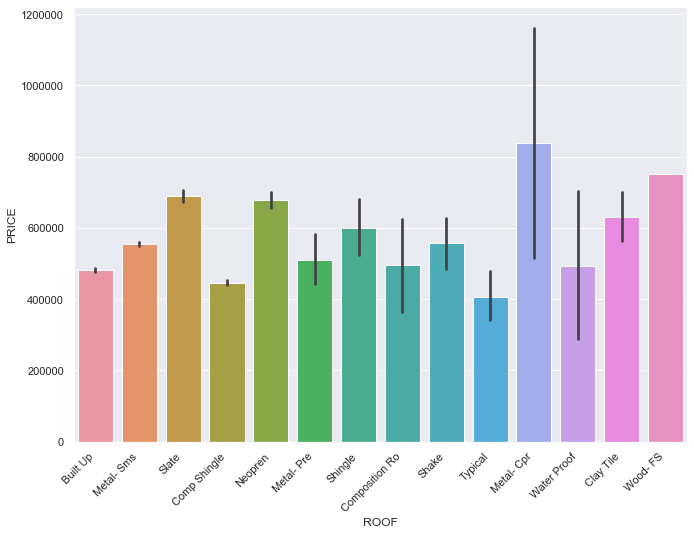

In [77]:
plot = sns.barplot(y='PRICE',x='ROOF',data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

### Struct

[Text(0, 0, 'Town Inside'),
 Text(0, 0, 'Row Inside'),
 Text(0, 0, 'Single'),
 Text(0, 0, 'Row End'),
 Text(0, 0, 'Multi'),
 Text(0, 0, 'Semi-Detached'),
 Text(0, 0, 'Town End')]

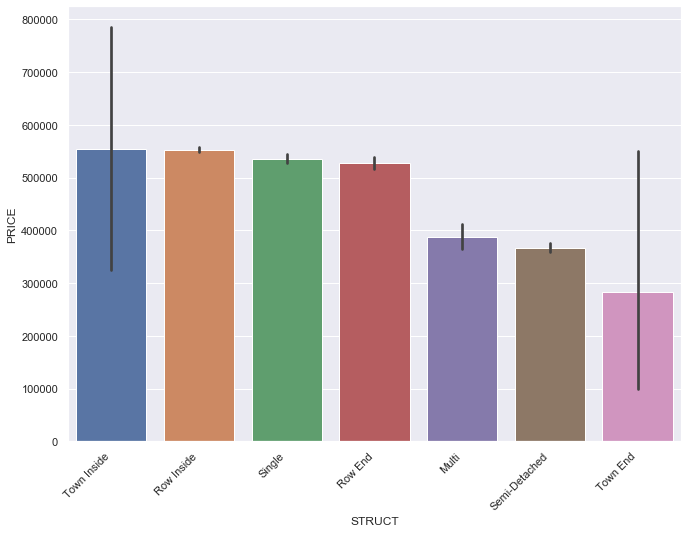

In [78]:
structVars = df.groupby('STRUCT').mean()['PRICE'].sort_values(ascending=False).index
plot = sns.barplot(y='PRICE',x='STRUCT',data=df,order=structVars)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

### Story and Style

In [79]:
df.loc[df['STORIES'] == 6.0,'STYLE'].value_counts()

2.5 Story Fin    1
Name: STYLE, dtype: int64

In [80]:
df['STYLE'].value_counts()

2 Story            19975
3 Story             1529
2.5 Story Fin        910
1 Story              632
1.5 Story Fin        423
2.5 Story Unfin      143
Split Foyer           45
Split Level           25
4 Story               22
1.5 Story Unfin       20
3.5 Story Fin          9
Bi-Level               3
Vacant                 1
3.5 Story Unfin        1
4.5 Story Unfin        1
Name: STYLE, dtype: int64

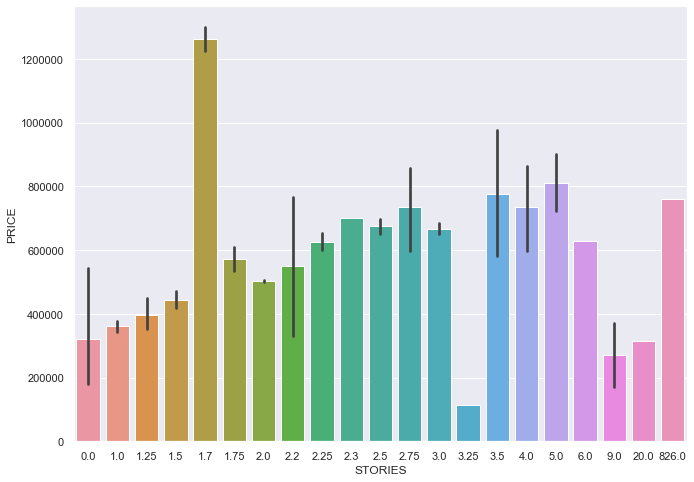

In [81]:
sns.barplot(y="PRICE",x='STORIES',data=df)

**Outliers**

In [82]:
df['STORIES2'] = df['STORIES']
df.loc[df['STORIES2'] == 1.70,'STORIES2'] = 1.5
df.loc[df['STORIES2'] == 1.75,'STORIES2'] = 1.5
df.loc[df['STORIES2'] == 1.25,'STORIES2'] = 1.5
df.loc[df['STORIES2'] == 2.2,'STORIES2'] = 2.5
df.loc[df['STORIES2'] == 2.25,'STORIES2'] = 2.5
df.loc[df['STORIES2'] == 2.2,'STORIES2'] = 2.5
df.loc[df['STORIES2'] == 2.3,'STORIES2'] = 2.5
df.loc[df['STORIES2'] == 2.75,'STORIES2'] = 2.5
df.loc[df['STORIES2'] == 2.7,'STORIES2'] = 2.5
df.loc[df['STORIES2'] == 3.25,'STORIES2'] = 3.5
df.loc[df['STORIES2'] == 3.7,'STORIES2'] = 3.5
df.loc[df['STORIES2'] > 4,'STORIES2'] = '>4'

In [83]:
df['STYLE'].unique()

array(['3 Story', '2 Story', '4 Story', '1 Story', '2.5 Story Fin',
       '1.5 Story Fin', '2.5 Story Unfin', '3.5 Story Fin',
       '3.5 Story Unfin', '1.5 Story Unfin', 'Split Level', 'Vacant',
       'Split Foyer', 'Bi-Level', '4.5 Story Unfin'], dtype=object)

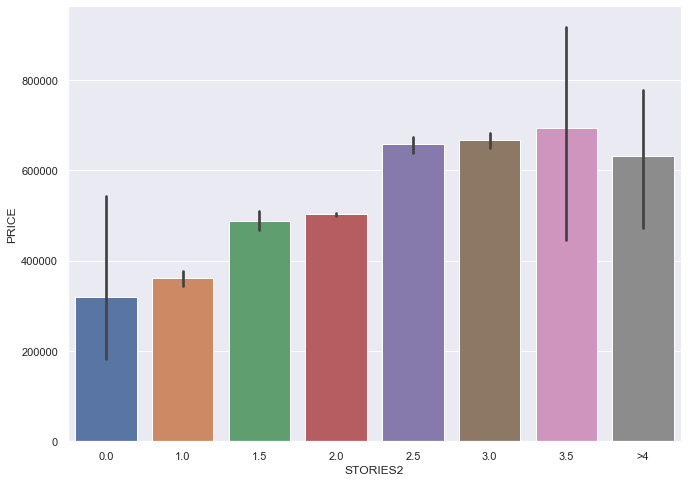

In [84]:
stories2Vars = [0.0,1.0,1.5,2.0,2.5,3.0,3.5,'>4']

sns.barplot(y="PRICE",x='STORIES2',data=df,order=stories2Vars)

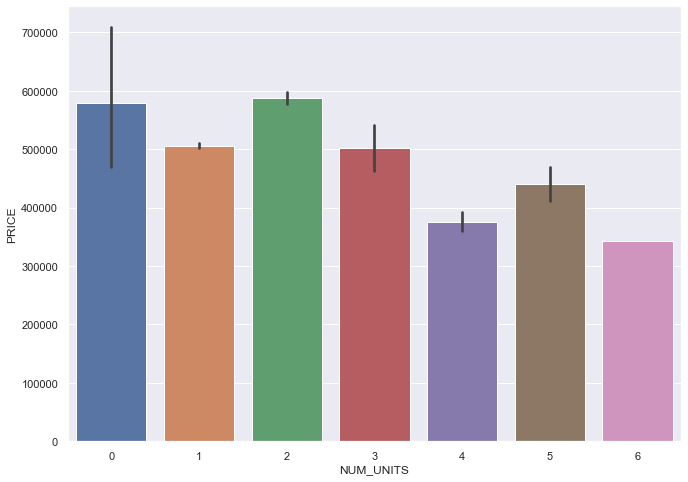

In [256]:
sns.barplot(y="PRICE",x='NUM_UNITS',data=df)

### Qualified

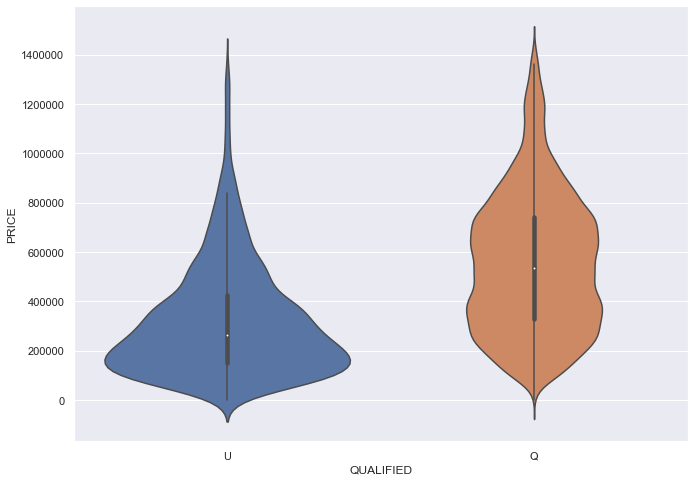

In [85]:
sns.violinplot(y='PRICE',x="QUALIFIED",data=df,split=True)

### Multicollinearity 

In [86]:
df.drop(columns=['ZIPCODE','NATIONALGRID', 'LATITUDE', 'LONGITUDE',
                 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK','SQUARE','USECODE','BLDG_NUM','SALE_NUM','INTWALL','STORIES'],inplace=True)

[Text(0.5, 0, 'BATHRM'),
 Text(1.5, 0, 'HF_BATHRM'),
 Text(2.5, 0, 'NUM_UNITS'),
 Text(3.5, 0, 'ROOMS'),
 Text(4.5, 0, 'BEDRM'),
 Text(5.5, 0, 'AYB'),
 Text(6.5, 0, 'YR_RMDL'),
 Text(7.5, 0, 'EYB'),
 Text(8.5, 0, 'PRICE'),
 Text(9.5, 0, 'GBA'),
 Text(10.5, 0, 'KITCHENS'),
 Text(11.5, 0, 'FIREPLACES'),
 Text(12.5, 0, 'LANDAREA'),
 Text(13.5, 0, 'SALEDATE_YEAR'),
 Text(14.5, 0, 'SALEDATE_MONTH'),
 Text(15.5, 0, 'SALEDATE_QUARTER'),
 Text(16.5, 0, 'DiffYB'),
 Text(17.5, 0, 'Diff_YB_YRMDL')]

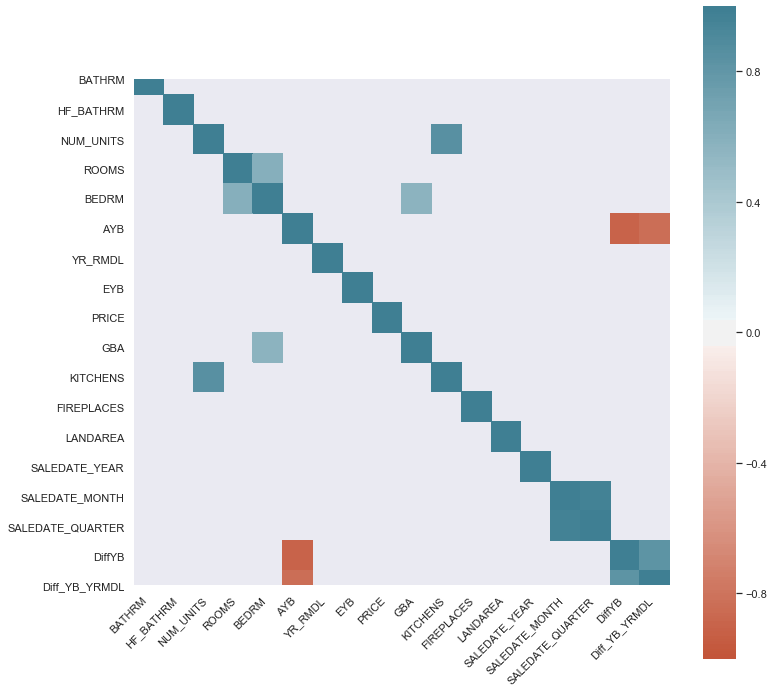

In [87]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,12))
corr = df.corr()
ax = sns.heatmap(
    corr[abs(corr) > 0.55], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [88]:
drop_cols_lr = []

### Statistical Tests

**NUM_UNITS vs KITCHEN**

In [89]:
f_regression(X=df[['NUM_UNITS','KITCHENS']],y=df[targetVar])

(array([172.27575838, 441.8871152 ]), array([3.2270214e-39, 3.2355737e-97]))

KITHENS has a lower p_value (0.05) so I maintain this variable

In [257]:
df[['NUM_UNITS','KITCHENS',targetVar]].corr()

,NUM_UNITS,KITCHENS,PRICE
NUM_UNITS,1.000000,0.873945,-0.014893
KITCHENS,0.873945,1.000000,0.018379
PRICE,-0.014893,0.018379,1.000000


In [90]:
drop_cols_lr.append('NUM_UNITS')

**ROOMS vs BEDRMS vs GBA**

In [91]:
f_regression(X=df[['ROOMS','BEDRM','GBA']],y=df[targetVar])

(array([1298.43925892, 1536.33526659, 3350.44243749]),
 array([7.00388174e-277, 0.00000000e+000, 0.00000000e+000]))

In [92]:
df[['ROOMS','BEDRM','GBA',targetVar]].corr()

,ROOMS,BEDRM,GBA,PRICE
ROOMS,1.000000,0.600589,0.544928,0.227737
BEDRM,0.600589,1.000000,0.571404,0.246554
GBA,0.544928,0.571404,1.000000,0.351696
PRICE,0.227737,0.246554,0.351696,1.000000


GBA has a higher correlation so I maintain this variable

In [93]:
drop_cols_lr.append('ROOMS')
drop_cols_lr.append('BEDRM')

**AYB vs DiffYB vs Diff_YB_YRMDL**

In [94]:
f_regression(X=df[['AYB','DiffYB','Diff_YB_YRMDL']],y=df[targetVar])

(array([1308.78466644, 4584.7639931 , 2275.67182751]),
 array([5.17824403e-279, 0.00000000e+000, 0.00000000e+000]))

In [95]:
df[['AYB','DiffYB','Diff_YB_YRMDL',targetVar]].corr()

,AYB,DiffYB,Diff_YB_YRMDL,PRICE
AYB,1.000000,-0.899354,-0.834993,-0.228595
DiffYB,-0.899354,1.000000,0.824453,0.402345
Diff_YB_YRMDL,-0.834993,0.824453,1.000000,0.295776
PRICE,-0.228595,0.402345,0.295776,1.000000


I maintain DiffYB

In [96]:
drop_cols_lr.append('AYB')
drop_cols_lr.append('Diff_YB_YRMDL')

**SALEDATE_MONTH vs SALEDATE_QUARTER**

In [97]:
f_regression(X=df[['SALEDATE_MONTH','SALEDATE_QUARTER']],y=df[targetVar])

(array([7.17363857, 8.53600515]), array([0.00740335, 0.00348517]))

In [98]:
drop_cols_lr.append('SALEDATE_MONTH')

[Text(0.5, 0, 'BATHRM'),
 Text(1.5, 0, 'HF_BATHRM'),
 Text(2.5, 0, 'YR_RMDL'),
 Text(3.5, 0, 'EYB'),
 Text(4.5, 0, 'PRICE'),
 Text(5.5, 0, 'GBA'),
 Text(6.5, 0, 'KITCHENS'),
 Text(7.5, 0, 'FIREPLACES'),
 Text(8.5, 0, 'LANDAREA'),
 Text(9.5, 0, 'SALEDATE_YEAR'),
 Text(10.5, 0, 'SALEDATE_QUARTER'),
 Text(11.5, 0, 'DiffYB')]

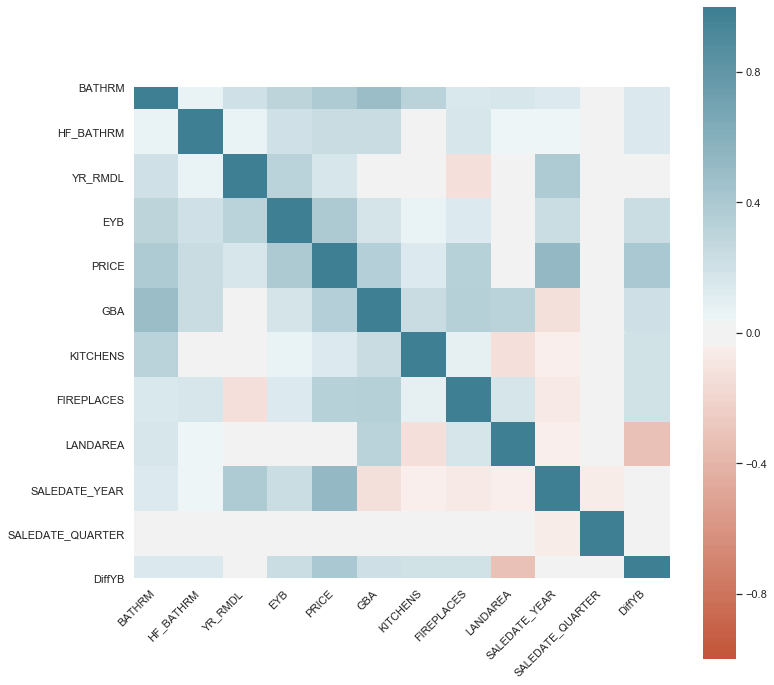

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,12))
corr = df.drop(columns=drop_cols_lr).corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [100]:
X = df.loc[:,df.columns != targetVar]
y = df[targetVar]

In [101]:
X.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,GBA,KITCHENS,FIREPLACES,LANDAREA,SALEDATE_YEAR,SALEDATE_MONTH,SALEDATE_QUARTER,DiffYB,Diff_YB_YRMDL
count,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000
mean,2.090442,0.625216,1.160664,6.950377,3.254392,1922.584018,2004.618434,1967.637095,1501.281773,1.194869,0.523527,2416.986141,2010.276423,6.655419,2.544421,45.053077,82.034416
std,0.834296,0.552667,0.399112,1.653734,0.918554,20.718525,12.621161,9.327114,476.734026,0.423454,0.702942,1641.620674,6.308122,3.286957,1.072286,20.855285,22.714631
min,1.000000,0.000000,0.000000,2.000000,1.000000,1765.000000,1900.000000,1915.000000,407.000000,0.000000,0.000000,216.000000,1986.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,6.000000,3.000000,1909.000000,2003.000000,1964.000000,1174.000000,1.000000,0.000000,1355.000000,2006.000000,4.000000,2.000000,28.000000,68.000000
50%,2.000000,1.000000,1.000000,7.000000,3.000000,1923.000000,2008.000000,1967.000000,1428.000000,1.000000,0.000000,1800.000000,2012.000000,7.000000,3.000000,45.000000,85.000000
75%,3.000000,1.000000,1.000000,8.000000,4.000000,1937.000000,2013.000000,1969.000000,1731.000000,1.000000,1.000000,2850.000000,2015.000000,9.000000,3.000000,59.000000,98.000000
max,5.000000,2.000000,4.000000,15.000000,7.000000,2012.000000,2018.000000,2015.000000,3585.000000,3.000000,3.000000,9802.000000,2018.000000,12.000000,4.000000,218.000000,234.000000


### Encoding

In [102]:
X.columns[X.dtypes == object]

Index(['HEAT', 'AC', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'ASSESSMENT_NBHD', 'WARD', 'QUADRANT', 'INTWALL2',
       'STORIES2'],
      dtype='object')

In [103]:
X = X.copy()
X.loc[X['AC'] == 'Y','AC'] = 1
X.loc[X['AC'] == 'N','AC'] = 0
X['AC'] = X['AC'].astype('int')

X.loc[X['QUALIFIED'] == 'Q','QUALIFIED'] = 1
X.loc[X['QUALIFIED'] == 'U','QUALIFIED'] = 0
X['QUALIFIED'] = X['QUALIFIED'].astype('int')

In [104]:
catVars = ['STRUCT','HEAT','STYLE','EXTWALL', 'ROOF', 'ASSESSMENT_NBHD', 'WARD', 'QUADRANT','INTWALL2', 'STORIES2']

In [105]:
X = pd.concat([X,pd.get_dummies(X[catVars],drop_first=True)],axis=1)

In [106]:
X.drop(columns=catVars+ ['SALEDATE'],inplace=True)

In [107]:
X.columns[X.dtypes == object]

Index(['GRADE', 'CNDTN'], dtype='object')

In [108]:
for i, val in enumerate(gradeVars):
    X.loc[X['GRADE']==val,'GRADE'] = i

In [109]:
for i, val in enumerate(cndtnVars):
    X.loc[X['CNDTN']==val,'CNDTN'] = i

In [110]:
X.drop(columns=['GRADE', 'CNDTN'],inplace=True)

## Train - Test Split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
def metricsEvaluation(y_test,predictions,predictors):

    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    r_squared = metrics.r2_score(y_test, predictions)
    print('R squared:',r_squared)
    print('Adjusted R squared:', 1 - (1-r_squared)*(len(y)-1)/(len(y)-predictors-1))


## Random Forest

In [113]:
rf = RandomForestRegressor(n_estimators=1000,max_features='sqrt')

In [114]:
scores = cross_validate(rf,X_train,y_train,cv=5,scoring=('r2','neg_mean_absolute_error'))

In [115]:
print("R Squared: %0.2f (+/- %0.2f)" % (scores['test_r2'].mean(), scores['test_r2'].std() * 2))
print("Neg Mean Absolute Error: %0.2f (+/- %0.2f)" % (scores['test_neg_mean_absolute_error'].mean(), scores['test_neg_mean_absolute_error'].std() * 2))

R Squared: 0.82 (+/- 0.01)
Neg Mean Absolute Error: -88286.73 (+/- 3891.45)


**Feature Importance**

In [116]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [117]:
feature_imp = pd.DataFrame(rf.feature_importances_,X.columns)

In [118]:
feature_imp.columns = ['Importance']

In [119]:
feature_imp = feature_imp['Importance'].sort_values(ascending=False)

[Text(0, 0, 'SALEDATE_YEAR'),
 Text(0, 0, 'EYB'),
 Text(0, 0, 'DiffYB'),
 Text(0, 0, 'GBA'),
 Text(0, 0, 'Diff_YB_YRMDL'),
 Text(0, 0, 'BATHRM'),
 Text(0, 0, 'QUALIFIED'),
 Text(0, 0, 'WARD_Ward 7'),
 Text(0, 0, 'AYB'),
 Text(0, 0, 'FIREPLACES'),
 Text(0, 0, 'YR_RMDL'),
 Text(0, 0, 'LANDAREA'),
 Text(0, 0, 'QUADRANT_NW'),
 Text(0, 0, 'ROOMS'),
 Text(0, 0, 'BEDRM'),
 Text(0, 0, 'SALEDATE_MONTH'),
 Text(0, 0, 'WARD_Ward 8'),
 Text(0, 0, 'HF_BATHRM'),
 Text(0, 0, 'AC'),
 Text(0, 0, 'WARD_Ward 6')]

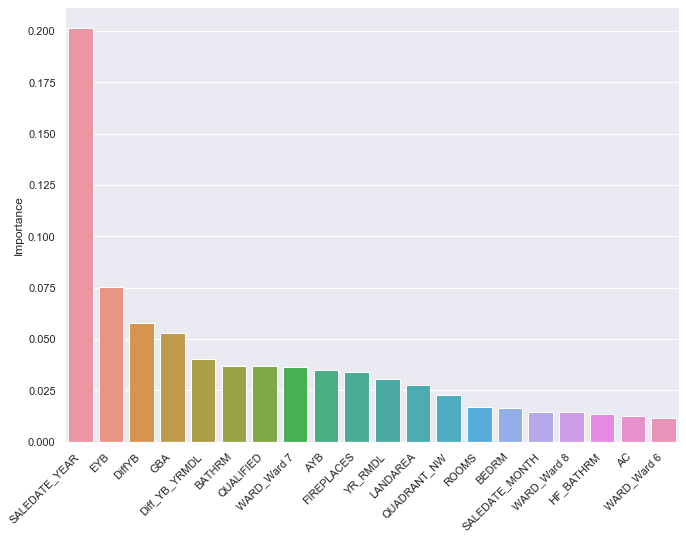

In [120]:
plot = sns.barplot(y=feature_imp[:20],x=feature_imp[:20].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

## Linear Regression

In [121]:
X_lr = X.drop(columns=drop_cols_lr)
X_scaled = scale(X_lr, axis=0, with_mean=True, with_std=True, copy=True)

In [122]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [123]:
lr = LinearRegression()

In [124]:
scores = cross_validate(lr,X_train_scaled,y_train_scaled,cv=5,scoring=('r2','neg_mean_absolute_error'))

In [125]:
print("R Squared: %0.2f (+/- %0.2f)" % (scores['test_r2'].mean(), scores['test_r2'].std() * 2))
print("Neg Mean Absolute Error: %0.2f (+/- %0.2f)" % (scores['test_neg_mean_absolute_error'].mean(), scores['test_neg_mean_absolute_error'].std() * 2))

R Squared: -19102758536913136748855296.00 (+/- 51238961844879202747154432.00)
Neg Mean Absolute Error: -16672178003036628.00 (+/- 38378260614961400.00)


## Ridge

In [126]:
ridge = Ridge(10)

In [127]:
scores = cross_validate(ridge,X_train_scaled,y_train_scaled,cv=5,scoring=('r2','neg_mean_absolute_error'))

In [128]:
print("R Squared: %0.2f (+/- %0.2f)" % (scores['test_r2'].mean(), scores['test_r2'].std() * 2))
print("Neg Mean Absolute Error: %0.2f (+/- %0.2f)" % (scores['test_neg_mean_absolute_error'].mean(), scores['test_neg_mean_absolute_error'].std() * 2))

R Squared: 0.80 (+/- 0.01)
Neg Mean Absolute Error: -98428.87 (+/- 3783.95)


In [129]:
ridge.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [130]:
ridge_coef = pd.DataFrame(ridge.coef_,X.columns)
ridge_coef.columns = ['Coefficients']
ridge_coef.head(10)

,Coefficients
BATHRM,27316.557900
HF_BATHRM,22417.686999
AC,17077.104908
NUM_UNITS,-18752.005367
ROOMS,4688.474930
BEDRM,13645.145018
AYB,81.491261
YR_RMDL,-226.471194
EYB,1578.362489
QUALIFIED,115102.746689


[Text(0, 0, 'ASSESSMENT_NBHD_Capitol Hill'),
 Text(0, 0, 'ASSESSMENT_NBHD_Spring Valley'),
 Text(0, 0, 'ASSESSMENT_NBHD_Mt. Pleasant'),
 Text(0, 0, 'ASSESSMENT_NBHD_Chevy Chase'),
 Text(0, 0, 'ASSESSMENT_NBHD_Berkley'),
 Text(0, 0, 'ASSESSMENT_NBHD_American University'),
 Text(0, 0, 'WARD_Ward 2'),
 Text(0, 0, 'ASSESSMENT_NBHD_Georgetown'),
 Text(0, 0, 'ASSESSMENT_NBHD_Kent'),
 Text(0, 0, 'ASSESSMENT_NBHD_Palisades'),
 Text(0, 0, 'QUALIFIED'),
 Text(0, 0, 'ASSESSMENT_NBHD_Old City 1'),
 Text(0, 0, 'ASSESSMENT_NBHD_Wesley Heights'),
 Text(0, 0, 'ASSESSMENT_NBHD_Burleith'),
 Text(0, 0, 'ASSESSMENT_NBHD_Kalorama'),
 Text(0, 0, 'ASSESSMENT_NBHD_Ledroit Park'),
 Text(0, 0, 'ASSESSMENT_NBHD_Old City 2'),
 Text(0, 0, 'STRUCT_Single'),
 Text(0, 0, 'STRUCT_Row Inside'),
 Text(0, 0, 'STRUCT_Row End')]

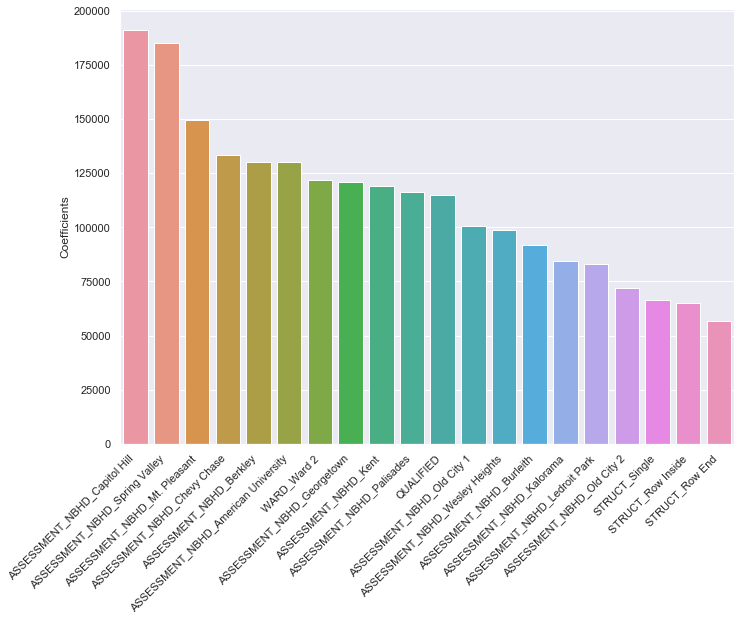

In [131]:
plot = sns.barplot(y = ridge_coef['Coefficients'].sort_values(ascending=False)[:20],x = ridge_coef['Coefficients'].sort_values(ascending=False)[:20].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'WARD_Ward 8'),
 Text(0, 0, 'WARD_Ward 7'),
 Text(0, 0, 'WARD_Ward 5'),
 Text(0, 0, 'ASSESSMENT_NBHD_Brightwood'),
 Text(0, 0, 'ASSESSMENT_NBHD_Congress Heights'),
 Text(0, 0, 'ASSESSMENT_NBHD_Petworth'),
 Text(0, 0, 'ASSESSMENT_NBHD_Marshall Heights'),
 Text(0, 0, 'ASSESSMENT_NBHD_Randle Heights'),
 Text(0, 0, 'ASSESSMENT_NBHD_Brentwood'),
 Text(0, 0, 'HEAT_Evp Cool'),
 Text(0, 0, 'ASSESSMENT_NBHD_Anacostia'),
 Text(0, 0, 'HEAT_Wall Furnace'),
 Text(0, 0, 'ASSESSMENT_NBHD_Deanwood'),
 Text(0, 0, 'INTWALL2_Hardwood/Carp'),
 Text(0, 0, 'STYLE_Split Foyer'),
 Text(0, 0, 'EXTWALL_Metal Siding'),
 Text(0, 0, 'EXTWALL_Vinyl Siding'),
 Text(0, 0, 'WARD_Ward 4'),
 Text(0, 0, 'ASSESSMENT_NBHD_Lily Ponds'),
 Text(0, 0, 'ROOF_Water Proof')]

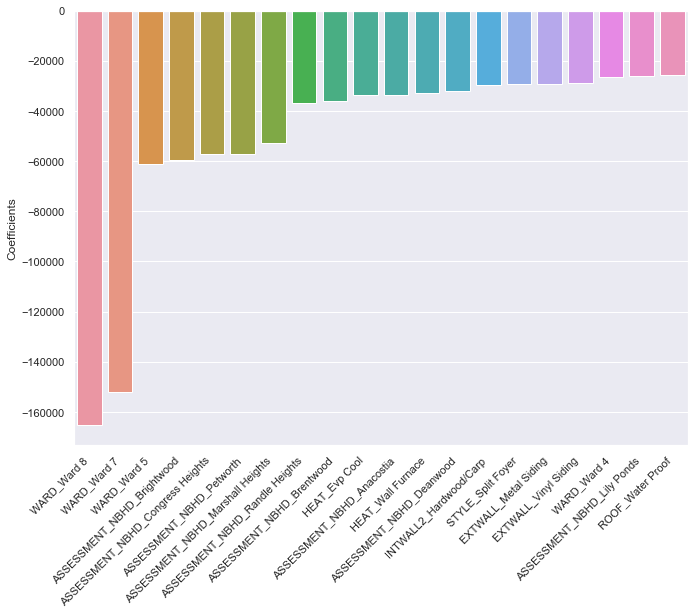

In [132]:
plot = sns.barplot(y = ridge_coef['Coefficients'].sort_values(ascending=True)[:20],x = ridge_coef['Coefficients'].sort_values(ascending=True)[:20].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

## Transform Y

**Ridge**

In [133]:
tt_ridge = TransformedTargetRegressor(regressor=Ridge(10),func=np.log, inverse_func=np.exp)

In [134]:
scores = cross_validate(tt_ridge,X_train_scaled,y_train_scaled,cv=5,scoring=('r2','neg_mean_absolute_error'))

In [135]:
print("R Squared: %0.2f (+/- %0.2f)" % (scores['test_r2'].mean(), scores['test_r2'].std() * 2))
print("Neg Mean Absolute Error: %0.2f (+/- %0.2f)" % (scores['test_neg_mean_absolute_error'].mean(), scores['test_neg_mean_absolute_error'].std() * 2))

R Squared: 0.82 (+/- 0.02)
Neg Mean Absolute Error: -87092.22 (+/- 3710.79)


### Optimization Hyperparameters

**Random Forest**

In [136]:
rf = RandomForestRegressor(max_features='sqrt')

In [137]:
params = {'n_estimators' : [100,500,1000]}

In [138]:
gridRF = GridSearchCV(rf,params,scoring='r2',cv=5,n_jobs=-1)

In [139]:
gridRF.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [100, 500, 1000]}

In [140]:
gridRF.best_score_

0.8217533949217425

In [141]:
gridRF.best_params_

{'n_estimators': 1000}

**Ridge Transformed**

In [142]:
ridge = Ridge()

In [143]:
params = {'alpha' : [0.1,1,10,50,100]}

In [144]:
gridRidge = GridSearchCV(ridge,params,scoring='r2',cv=5,n_jobs=-1)

In [145]:
gridRidge.fit(X_train_scaled,y_train_scaled)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1, param_grid={'alpha': [0.1, 1, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [146]:
gridRidge.best_score_

0.7994918272255171

In [147]:
gridRidge.best_params_

{'alpha': 10}

### Results in Test Set 

In [152]:
y_pred = gridRF.best_estimator_.predict(X_test)

In [153]:
metricsEvaluation(y_test=y_test,predictions=y_pred,predictors=X.shape[1])

MAE: 87518.87994318074
MSE: 14347499726.672756
RMSE: 119781.04911325812
R squared: 0.8263224875863848
Adjusted R squared: 0.8253143176274567


In [150]:
y_pred = gridRidge.best_estimator_.predict(X_test_scaled)

In [151]:
metricsEvaluation(y_test=y_test,predictions=y_pred,predictors=X_scaled.shape[1])

MAE: 98791.37343175888
MSE: 16513725855.002718
RMSE: 128505.74249815733
R squared: 0.8001001650590456
Adjusted R squared: 0.7989908805935368
